# Intialize

In [62]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# # a simple conversion from cl's to dl's
# def l_to_dl(lp):
#     return lp*(lp+1.)/2./np.pi

# Compute matter bispectrum

In [76]:
%%time 
# zz = 1.
# M_min = 1e8
M = Class()
# M.set(ksz_params)
# M.set(common_params)
M.set(cosmo_params)

M.set({
#     'mass function' : 'T10',
#     'M_min': M_min,
#     'M_max': 1e16,
#     'hm_consistency':1,
    # 'output': 'bk_at_z_1h,bk_at_z_2h,bk_at_z_3h,bk_at_z_hf',
    'output': 'bk_at_z_hf',
#     'non linear': 'halofit',
'ndim_redshifts' : 100,
'z_min' : 0.005,
'z_max' : 3.0,
'non_linear' : 'halofit',
    'P_k_max_h/Mpc' : 30.,
    'k_per_decade_for_pk' : 50,

    'k_min_for_pk_class_sz' : 1e-4,
    'k_max_for_pk_class_sz' : 20.,
    'k_per_decade_class_sz' : 50.,
    # "dlnk_for_pk_hm" : 0.01,
    # "z_for_pk_hm" : zz,
    # "k_min_for_pk_hm" : 1e-4,
    # "k_max_for_pk_hm" : 2e1,
})
M.compute()

CPU times: user 31.3 s, sys: 53.5 ms, total: 31.4 s
Wall time: 3.42 s


In [77]:
z = 1
k1_a = np.geomspace(1e-6,10.,500)
h = M.h()

Bk1_SC = []
Bk1_TL = []
Bk1_GM = []
for k1 in k1_a:
    n = M.get_nl_index_at_z_and_k(z,k1)
    k2 = k1
    k3 = k1
    Bk1_TL.append(M.get_matter_bispectrum_at_z_tree_level_PT(k1,k2,k3,z))
    Bk1_SC.append(M.get_matter_bispectrum_at_z_effective_approach_SC(k1,k2,k3,z))
    Bk1_GM.append(M.get_matter_bispectrum_at_z_effective_approach_smoothed(k1,k2,k3,z))

# n

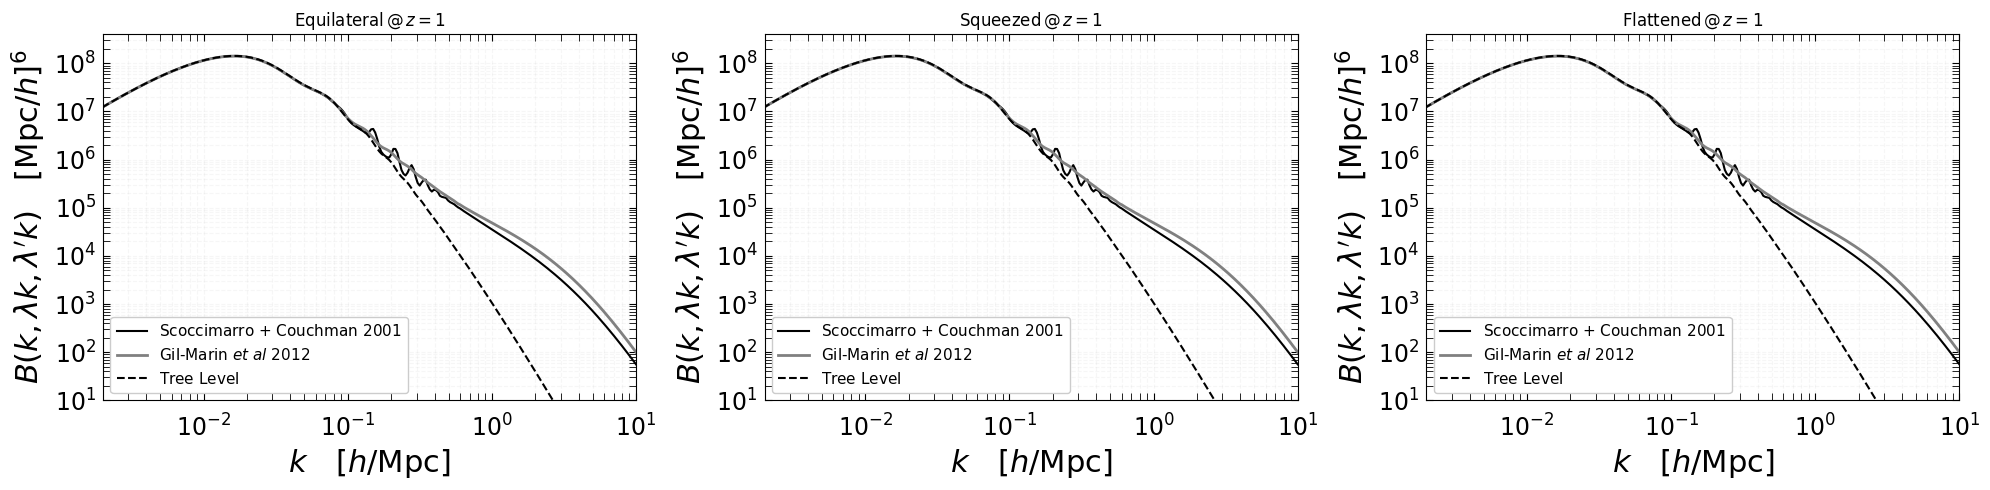

In [79]:
# k,bk_1h_eq,bk_2h_eq,bk_3h_eq = k1_a,

k_a,Bk1_SC_eq,Bk1_GM_eq,Bk1_TL_eq = k1_a,Bk1_SC,Bk1_GM,Bk1_TL

# k,bk_1h_sq,bk_2h_sq,bk_3h_sq = k1,Bk1_SC,Bk1_GM,Bk1_TL

k_a,Bk1_SC_sq,Bk1_GM_sq,Bk1_TL_sq = k1_a,Bk1_SC,Bk1_GM,Bk1_TL


# k,bk_1h_f,bk_2h_f,bk_3h_f = k1,Bk1_SC,Bk1_GM,Bk1_TL

k_a,Bk1_SC_f,Bk1_GM_f,Bk1_TL_f = k1_a,Bk1_SC,Bk1_GM,Bk1_TL

label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

# ax.plot(k,bk_1h_eq,label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
# ax.plot(k,bk_2h_eq,label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
# ax.plot(k,bk_3h_eq,label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
# ax.plot(k,np.asarray(bk_1h_eq)+np.asarray(bk_2h_eq)+np.asarray(bk_3h_eq),
#         label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)


ax.plot(k_a,np.asarray(Bk1_SC_eq),label=r'$\mathrm{Scoccimarro}$ $+$ $\mathrm{Couchman}$ $2001$',alpha=1.,c='k')
ax.plot(k_a,np.asarray(Bk1_GM_eq),label=r'$\mathrm{Gil}$-$\mathrm{Marin}$ $et$ $al$ $2012$',alpha=1.,c='grey',lw=2.,ls='-')
ax.plot(k_a,np.asarray(Bk1_TL_eq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,c='k',lw=1.5,ls='--')
ax.loglog()

ax.set_ylim(1e1,4e8)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)

ax.set_title(r'$\mathrm{Equilateral}\,@\, z=1$')




    
ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

# ax.plot(k,bk_1h_sq,label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
# ax.plot(k,bk_2h_sq,label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
# ax.plot(k,bk_3h_sq,label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
# ax.plot(k,np.asarray(bk_1h_sq)+np.asarray(bk_2h_sq)+np.asarray(bk_3h_sq),
#         label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)


ax.plot(k_a,np.asarray(Bk1_SC_sq),label=r'$\mathrm{Scoccimarro}$ $+$ $\mathrm{Couchman}$ $2001$',alpha=1.,c='k')
ax.plot(k_a,np.asarray(Bk1_GM_sq),label=r'$\mathrm{Gil}$-$\mathrm{Marin}$ $et$ $al$ $2012$',alpha=1.,c='grey',lw=2.,ls='-')
ax.plot(k_a,np.asarray(Bk1_TL_sq),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,c='k',lw=1.5,ls='--')
ax.loglog()

ax.set_ylim(1e1,4e8)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11)
ax.set_title(r'$\mathrm{Squeezed}\,@\, z=1$')



ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r'$B(k,\lambda k,\lambda^\prime k)\quad\mathrm{[Mpc}/h]^6$',size=title_size)
ax.set_xlabel(r'$k\quad[h\mathrm{/Mpc]}$',size=title_size)

# ax.plot(k,bk_1h_f,label = r'$1\,\mathrm{h}$',c='k',ls=':',lw=0.5)
# ax.plot(k,bk_2h_f,label = r'$2\,\mathrm{h}$',c='k',ls='-.',lw=0.5)
# ax.plot(k,bk_3h_f,label = r'$3\,\mathrm{h}$',c='k',ls='--',lw=0.5)
# ax.plot(k,np.asarray(bk_1h_f)+np.asarray(bk_2h_f)+np.asarray(bk_3h_f),
#         label = r'$1+2+3\,\mathrm{h}$',c='r',ls='-',lw=2.)


ax.plot(k_a,np.asarray(Bk1_SC_f),label=r'$\mathrm{Scoccimarro}$ $+$ $\mathrm{Couchman}$ $2001$',alpha=1.,c='k')
ax.plot(k_a,np.asarray(Bk1_GM_f),label=r'$\mathrm{Gil}$-$\mathrm{Marin}$ $et$ $al$ $2012$',alpha=1.,c='grey',lw=2.,ls='-')
ax.plot(k_a,np.asarray(Bk1_TL_f),label=r'$\mathrm{Tree}$ $\mathrm{Level}$',alpha=1.,c='k',lw=1.5,ls='--')
ax.loglog()

ax.set_ylim(1e1,4e8)
ax.set_xlim(2e-3,1e1)

ax.legend(loc=3,frameon=True,framealpha=1,fontsize=11,ncol=1)
ax.set_title(r'$\mathrm{Flattened}\,@\, z=1$')

fig.tight_layout()
plt.savefig('figures/Bkz_effective.pdf')